Imports


In [23]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [24]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos dados

In [25]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

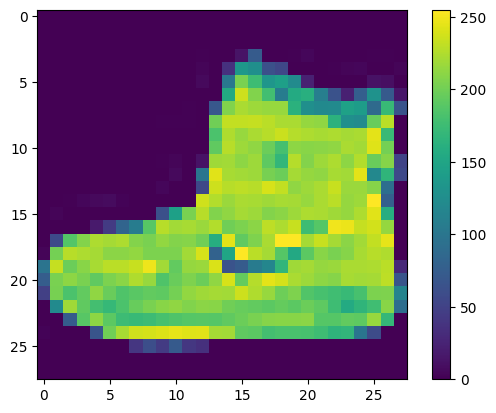

In [26]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()
  


Normalizando as imagens

In [27]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [28]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

Epoch 1/5
100/100 [==============================] - 4s 27ms/step - loss: 0.7191 - accuracy: 0.7516 - val_loss: 0.4834 - val_accuracy: 0.8346
Epoch 2/5
100/100 [==============================] - 2s 19ms/step - loss: 0.4681 - accuracy: 0.8390 - val_loss: 0.4244 - val_accuracy: 0.8512
Epoch 3/5
100/100 [==============================] - 2s 19ms/step - loss: 0.4137 - accuracy: 0.8564 - val_loss: 0.3948 - val_accuracy: 0.8587
Epoch 4/5
100/100 [==============================] - 2s 19ms/step - loss: 0.3848 - accuracy: 0.8651 - val_loss: 0.3704 - val_accuracy: 0.8689
Epoch 5/5
100/100 [==============================] - 2s 18ms/step - loss: 0.3655 - accuracy: 0.8709 - val_loss: 0.3619 - val_accuracy: 0.8735


Salvando e carregando o modelo treinado

Sumário do modelo

In [29]:
sumario_do_modelo = modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [30]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.04556312, -0.02487494,  0.0426028 , ..., -0.00573764,
         0.03845659, -0.02051332],
       [-0.05379524,  0.07892811,  0.00671563, ..., -0.01112612,
         0.0144753 ,  0.05501411],
       [-0.09813705, -0.01451459, -0.03458574, ..., -0.03861476,
        -0.02660567, -0.00162928],
       ...,
       [-0.05897124,  0.062167  , -0.12381548, ..., -0.01132163,
        -0.01476623, -0.017916  ],
       [ 0.0734631 ,  0.02970392, -0.0905966 , ...,  0.04558752,
         0.02273444, -0.06247149],
       [ 0.05170625,  0.03341006, -0.07999837, ...,  0.03999658,
        -0.11615571,  0.0250865 ]], dtype=float32)

In [31]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

[array([[0.46278813, 0.6406584 , 0.8510696 , ..., 0.17248747, 0.7343895 ,
         0.18021046],
        [0.5678349 , 0.23549563, 0.5781923 , ..., 0.48084557, 0.8821465 ,
         0.25025308],
        [0.20109142, 0.56795096, 0.44754383, ..., 0.56631404, 0.7399221 ,
         0.12898958],
        ...,
        [0.0193631 , 0.94319147, 0.878232  , ..., 0.82472676, 0.80053836,
         0.46625736],
        [0.12631921, 0.2205867 , 0.51282763, ..., 0.36388937, 0.00764326,
         0.13525628],
        [0.15842798, 0.34517124, 0.20267934, ..., 0.910527  , 0.38801566,
         0.41618925]], dtype=float32),
 array([-3.48199457e-02,  3.08554947e-01,  3.65309656e-01, -1.54959597e-02,
         6.22562319e-02,  3.78178298e-01, -1.15536405e-02, -1.77723572e-01,
        -3.43278535e-02,  1.16216749e-01,  2.35622749e-01,  2.29514018e-02,
         1.53413519e-01,  2.35007405e-01,  2.43614390e-01,  4.94637713e-02,
         1.58649147e-01,  2.43321434e-01, -1.73618272e-01,  2.49201119e-01,
         2.917

In [32]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 7ms/step - loss: 68.7570 - accuracy: 0.4106 - val_loss: 11.0286 - val_accuracy: 0.6879
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 17.5815 - accuracy: 0.6260 - val_loss: 7.7242 - val_accuracy: 0.6951
Epoch 3/5
1500/1500 [==============================] - 8s 6ms/step - loss: 7.1845 - accuracy: 0.6785 - val_loss: 2.9611 - val_accuracy: 0.7285
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 3.7020 - accuracy: 0.7024 - val_loss: 1.7428 - val_accuracy: 0.7743
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 1.9728 - accuracy: 0.7360 - val_loss: 1.0596 - val_accuracy: 0.8018


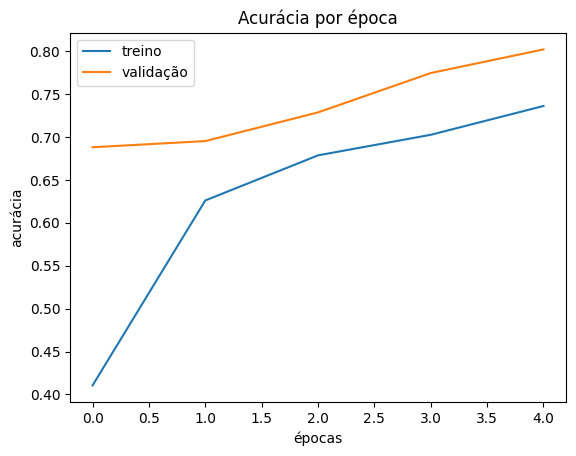

In [33]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

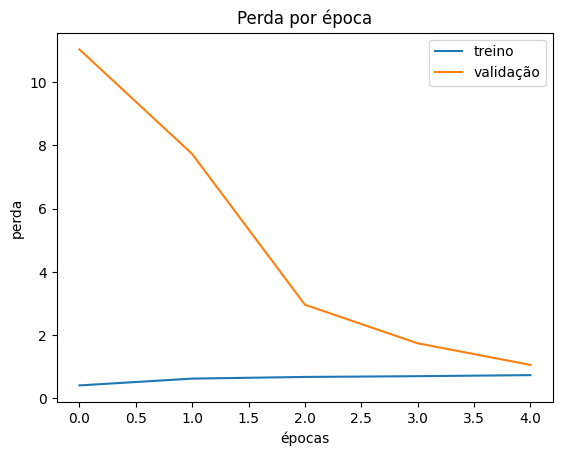

In [34]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [35]:
modelo.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_1_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_1',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_1',
    'trainable': True,
    'dtype': 'float32',
  

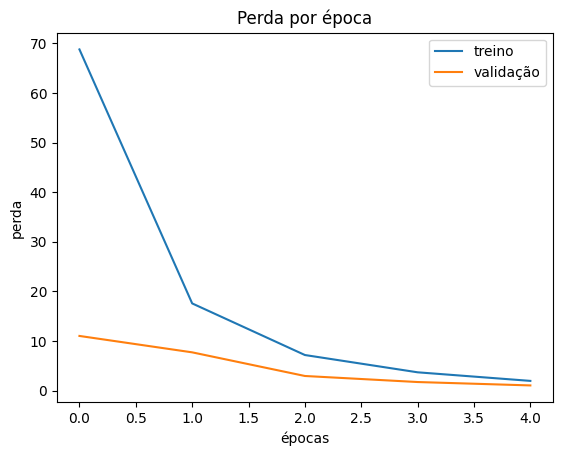

In [36]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [37]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [38]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

Salvando e carregando o modelo treinado

In [39]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando a acurácias de treino e validação por época

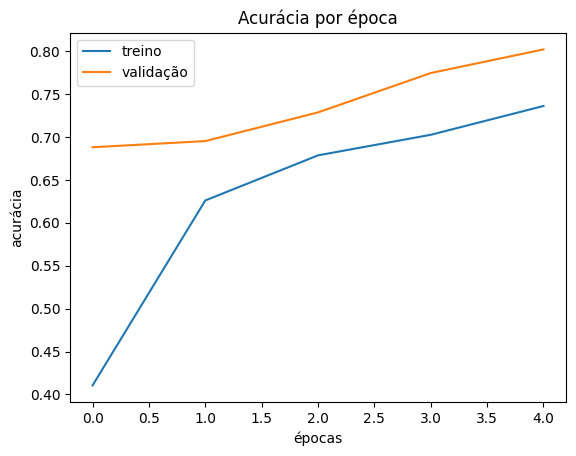

In [40]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Visualizando as perdas de treino e validação por época

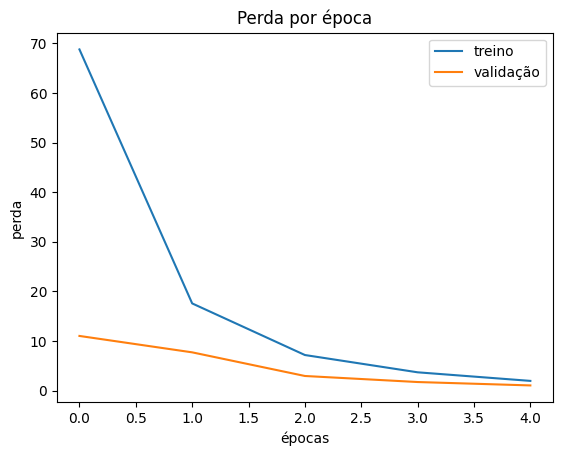

In [41]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [42]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])


313/313 [==============================] - 1s 2ms/step
resultado teste: 8
número da imagem de teste: 2
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 8
número da imagem de teste: 2


Avaliando o modelo

In [43]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 31250.6875 - accuracy: 0.1000
Perda do teste: 31250.6875
Acurácia do teste: 0.10000000149011612
